In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
sns.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=10)     # fontsize of the axes title
plt.rc('axes', labelsize=10)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('font', size=8)          # controls default text sizes

In [5]:
data = pd.read_csv('vax_state.csv')

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
population = pd.read_csv('Malaysia_Population_18yo.csv')

In [8]:

population["state"].replace({"perlis": "Perlis", 
                       "kedah": "Kedah",
                       "penang": "Pulau Pinang",
                       "peral": "Perak",
                       "selangor": "Selangor",
                       "kl": "W.P. Kuala Lumpur",
                       "putrajaya": "W.P. Putrajaya",
                       "ns": "Negeri Sembilan",
                       "melaka": "Melaka",
                       "kelantan": "Kelantan",
                       "terengganu": "Terengganu",
                       "pahang": "Pahang",
                       "johor": "Johor",
                       "sabah": "Sabah",
                       "labuan": "W.P. Labuan",
                       "sarawak": "Sarawak"
                       }, inplace=True)

In [9]:
population = pd.DataFrame(population)

In [17]:
merge = pd.merge(population, data, on="state")

In [18]:
merge.columns

Index(['state', 'population', 'date', 'dose1_daily', 'dose2_daily',
       'total_daily', 'dose1_cumul', 'dose2_cumul', 'total_cumul'],
      dtype='object')

In [20]:
merge['Percentage Fully Vaccinated'] = merge["dose2_cumul"] / merge['population']

In [25]:
data_bystatebydate = merge.groupby(['date', 'state'])["Percentage Fully Vaccinated"].sum()

In [26]:
df = pd.DataFrame(data_bystatebydate)

In [27]:
df

Percentage Fully Vaccinated
date       state                                         
2021-02-24 Johor                                 0.000000
           Kedah                                 0.000000
           Kelantan                              0.000000
           Melaka                                0.000000
           Negeri Sembilan                       0.000000
...                                                   ...
2021-06-29 Selangor                              0.059342
           Terengganu                            0.104055
           W.P. Kuala Lumpur                     0.127688
           W.P. Labuan                           0.210870
           W.P. Putrajaya                        0.473618

[1890 rows x 1 columns]

<AxesSubplot:xlabel='date,state'>

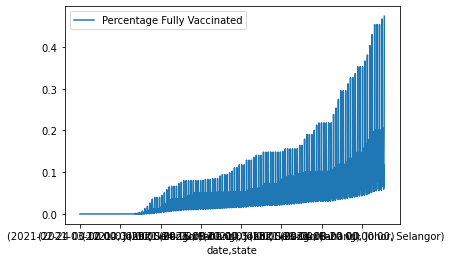

In [28]:
df.plot()

Text(0, 0.5, '% Fully Vaccinated (2 Doses)')

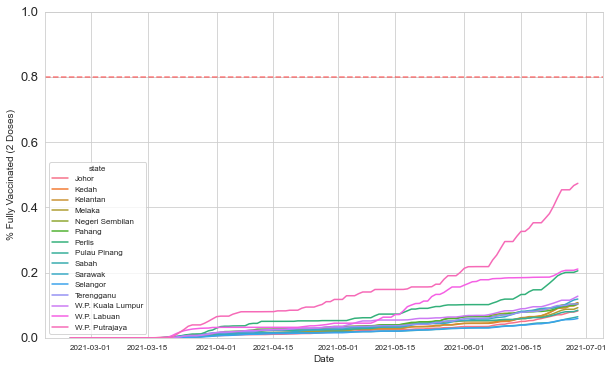

In [108]:
plt.figure(figsize=(10,6))
plt.ylim(0,1)
sns.lineplot(data=df, x='date', y='Percentage Fully Vaccinated', hue='state')
plt.axhline(y=0.8, linestyle='--', color='r', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated (2 Doses)')

In [97]:
df['Percentage Fully Vaccinated'].max()

0.4736176269042222

In [109]:
import plotly.express as px